# WORD EMBEDDING

In [1]:
#pip install tensorflow

In [2]:
# pip install gensim

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import re

In [2]:
df = pd.read_csv("reviews_trust.csv")
df = df[["Commentaire", "star"]]
df["Sentiment"] = df["star"].apply(lambda x : np.where(x >=4 , 1 , 0))  # ajout de la colonne Sentiment à df


In [3]:
#Suppression des valeurs manquantes de la colonne Commentaire
df = df.dropna(axis = 0, how = 'any', subset =["Commentaire"])
df.reset_index(inplace = True)
df = df.drop(['index','star'],axis = 1)

In [4]:
#Nettoyages des commentaires et étapes de normalisation 

def find_exclamation(com):   #compte le nombre de points d'exclamation d'un commentaire
    r = re.compile(r"\!")
    exclamation = r.findall(com)
    return len(exclamation)

def find_interogation(com): #compte le nombre de points d'interogation d'un commentaire
    r = re.compile(r"\?")
    interogation = r.findall(com)
    return len(interogation)

def findCAPSLOCK(com):  #compte le nombre de caractères en majuscule d'un commentaire
    r = re.compile(r"[A-Z]")
    capslock = r.findall(com)
    return len(capslock)

def find_etc(com): #compte le nombre de chaine de ".." d'un commentaire
    r = re.compile(r"\.{2,}")
    etc = r.findall(com)
    return len(etc)

df["CAPSLOCK"]= df["Commentaire"].apply(lambda x : findCAPSLOCK(x))
df["exclamation"]= df["Commentaire"].apply(lambda x : find_exclamation(x))
df["interogation"]= df["Commentaire"].apply(lambda x : find_interogation(x))
df["chainpoints"]= df["Commentaire"].apply(lambda x : find_etc(x))
df['nb_caracter'] = df["Commentaire"].apply(len)
#Tokenization via RegexpTokenizer

from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Zéèê]{3,}")
df["preprocessed"] = df["Commentaire"].apply(lambda x : " ".join(x.lower() for x in str(x).strip().split()))

# On remplace les éèê par e
def remplacement_carac_e(com):
    text=re.sub(r"[éèêë]","e",com)
    return text
df["preprocessed"] = df["preprocessed"].apply(lambda x : remplacement_carac_e(x))

def neg_identify(text): 
    text = tokenizer.tokenize(text)
    for pos, word in enumerate(text) :
        if pos != len(text)-1 :
            if (word == 'ne' or word == "n" or word =="n'"):
                text[pos+1] = "NON_"+text[pos+1]
    text = " ".join(text)
    return (text)
df["preprocessed"] = df["preprocessed"].apply(lambda x : neg_identify(x))

# Déclaration des stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
stop_words.update (["?","!",".","_",":",",",";","-","--","...","'","...","'",',',',','…la','la','le','les','..','…','(',')','a+','+','etc…','qq','``',"j'","j '"])
# après une première visualisation des données, "commande" est très freqement apparu dans les 2 catégories et n'apporte à priori pas d'information sur la satisfaction du client"
# print(stop_words)

# Definition d'une fonction de filtrage de stopwords
def stopwords_filtering(chaine): # fonction renvoyant une liste ne contenant pas les stopwords
    tokens =[]
    chaine = tokenizer.tokenize(chaine)
    for mot in chaine :
        if mot not in stop_words :#conservation des mots non stopwords 
            tokens.append(mot)
    tokens = " ".join(tokens)
    return tokens
df["preprocessed"] = df["preprocessed"].apply(lambda x : stopwords_filtering(x))

# Opération de stemming

from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
def  stemming(text) :
    text = tokenizer.tokenize(text)
    stemmed_text = ""
    for mot in text: 
        stem = stemmer.stem(mot)
        stemmed_text =  stemmed_text +" "+ stem
    return  stemmed_text

df["preprocessed"] = df["preprocessed"].apply(lambda x: stemming(x))


In [5]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Commentaire', 'Sentiment'], axis=1)
y = df["Sentiment"]

In [6]:
X.head(1)


,CAPSLOCK,exclamation,interogation,chainpoints,nb_caracter,preprocessed
0,18,21,2,1,1182,bonjour doit fair an environ membr showroopr ...


In [7]:
! pip install gensim

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [9]:
%%time
tokenized_comment = X['preprocessed'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_comment,
            vector_size=200, # nombre de variables indépendantes souhaité
            window=5, # nombre de fenêtres # initialement 5
            min_count=2, # Ignorer les mots dont la fréquence totale est inférieure à 2                                 
            sg = 1, # 1 pour skip-Gram
            hs = 0,
            negative = 10, # for negative sampling
            workers= -1, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_comment, total_examples = len(X['preprocessed']), epochs=20)

Wall time: 564 ms


(0, 0)

In [14]:
model_w2v.wv.index_to_key 

['command',
 'tre',
 'livraison',
 'plus',
 'produit',
 'client',
 'sit',
 'bien',
 'colis',
 'servic',
 'articl',
 'rembours',
 'vent',
 'bon',
 'tout',
 'ete',
 'mem',
 'fait',
 'rien',
 'qualit',
 'jour',
 'apre',
 'aucun',
 'mois',
 'toujour',
 'etait',
 'del',
 'fois',
 'retour',
 'donc',
 'fair',
 'car',
 'mail',
 'jam',
 'demand',
 'etre',
 'depuis',
 'chez',
 'prix',
 'autr',
 'prive',
 'appel',
 'rapid',
 'achat',
 'san',
 'livr',
 'cet',
 'arriv',
 'non',
 'conform',
 'problem',
 'avoir',
 'frais',
 'cel',
 'satisfait',
 'trop',
 'comm',
 'pass',
 'part',
 'taill',
 'alor',
 'achet',
 'repons',
 'temp',
 'merc',
 'parf',
 'attent',
 'marqu',
 'deux',
 'contact',
 'showroom',
 'peu',
 'attend',
 'vrai',
 'euros',
 'quand',
 'plusieur',
 'recommand',
 'veepe',
 'semain',
 'dit',
 'encor',
 'avant',
 'manqu',
 'showroompr',
 'compt',
 'dir',
 'dat',
 'telephon',
 'envoi',
 'prevu',
 'port',
 'trouv',
 'seul',
 'rel',
 'long',
 'annul',
 'dis',
 'point',
 'retourn',
 'faut',
 'pa

In [10]:
# La fonction ci-dessous permet de recréer le vecteur de chaque commentaire en considérant la moyenne des vecteurs des mots présents dans le commentaire

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

#préparation du word2vec feature

wordvec_arrays = np.zeros((len(tokenized_comment), 200)) 
for i in range(len(tokenized_comment)):
    wordvec_arrays[i,:] = word_vector(tokenized_comment[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(19834, 200)

In [18]:
from gensim.models.doc2vec import TaggedDocument

In [19]:
from gensim.models.doc2vec import TaggedDocument

def labelized_comment(comments):  # labeliser chaque commentaire de du dataframe
    labelized = []
    for i, s in zip(comments.index, comments):
        labelized.append(TaggedDocument(s, ["comment_" + str(i)]))
    return labelized

In [20]:
labeled_com = labelized_comment(tokenized_comment)


In [21]:
%%time

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for distributed memory model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=2, # Ignores all words with total frequency lower than 5.                                  
                                  workers=-1, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23 # for reproducibility
                                 ) 

model_d2v.build_vocab(labeled_com)

model_d2v.train(labeled_com, total_examples= len(X["preprocessed"]), epochs=20)

Wall time: 766 ms


In [22]:
# DOc2vec Feature Set

docvec_arrays = np.zeros((len(tokenized_comment), 200)) 
for i in range(len(X)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

<ipython-input-22-d09fa2871e37>:5: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))


(19834, 200)

## Sentiment analysis

### word2vec 

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Commentaire', 'Sentiment','preprocessed'], axis=1)
mms = MinMaxScaler()
X = pd.concat([wordvec_df, X], axis=1)
X = pd.DataFrame(mms.fit_transform(X), columns= X.columns)
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

### Logistic regression

In [24]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_reglog = LogisticRegression(C=1, max_iter= 10000)
clf_reglog.fit(X_train, y_train)


Wall time: 3.2 s


LogisticRegression(C=1, max_iter=10000)

Train Accuracy: 0.85
Test Accuracy: 0.86
classe prédite     0     1
classe réelle             
0               1376   276
1                292  2023
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1652
           1       0.88      0.87      0.88      2315

    accuracy                           0.86      3967
   macro avg       0.85      0.85      0.85      3967
weighted avg       0.86      0.86      0.86      3967

 -- Régression logistique --


Classe réelle,0,1
Classe prédite,,
0,1376,276
1,292,2023


              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1652
           1       0.88      0.87      0.88      2315

    accuracy                           0.86      3967
   macro avg       0.85      0.85      0.85      3967
weighted avg       0.86      0.86      0.86      3967

Wall time: 175 ms


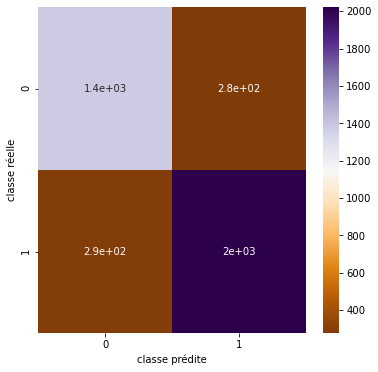

In [25]:
%%time
print ('Train Accuracy: %.2f'%clf_reglog.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_reglog.score(X_test, y_test))

pred = clf_reglog.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])

print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))
# Affichage des prédictions par les différents classifieurs
print(" -- Régression logistique --")
pred_clf_reglog = clf_reglog.predict(X_test)
display(pd.crosstab(y_test, pred_clf_reglog,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_reglog))

In [26]:
df.head(1)

,Commentaire,Sentiment,CAPSLOCK,exclamation,interogation,chainpoints,nb_caracter,preprocessed
0,"Bonjour , Ca doit faire 5 ans environ que je s...",0,18,21,2,1,1182,bonjour doit fair an environ membr showroopr ...


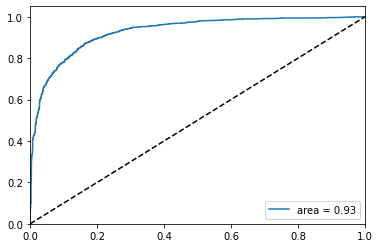

In [29]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_reglog.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### SVC

In [31]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf_svm= SVC(C=1, max_iter= 10000, probability= True)
clf_svm.fit(X_train, y_train)


Wall time: 3min 18s


SVC(C=1, max_iter=10000, probability=True)

Train Accuracy: 0.90
Test Accuracy: 0.87
classe prédite     0     1
classe réelle             
0               1403   249
1                278  2037
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1652
           1       0.89      0.88      0.89      2315

    accuracy                           0.87      3967
   macro avg       0.86      0.86      0.86      3967
weighted avg       0.87      0.87      0.87      3967

 -- SVC --


Classe réelle,0,1
Classe prédite,,
0,1403,249
1,278,2037


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1652
           1       0.89      0.88      0.89      2315

    accuracy                           0.87      3967
   macro avg       0.86      0.86      0.86      3967
weighted avg       0.87      0.87      0.87      3967



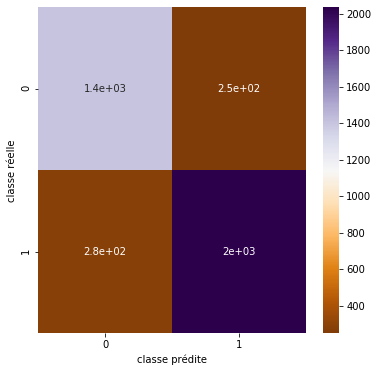

In [22]:
print ('Train Accuracy: %.2f'%clf_svm.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_svm.score(X_test, y_test))

pred = clf_svm.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');

print(classification_report(y_test, pred))


print(" -- SVC --")
pred_clf_svm = clf_svm.predict(X_test)
display(pd.crosstab(y_test, pred_clf_svm,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_svm))

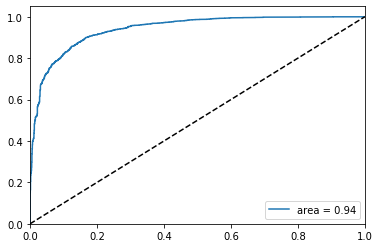

In [23]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_svm.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### Gradient Boosting

In [24]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

clf_GB= GradientBoostingClassifier()
clf_GB.fit(X_train, y_train)



Wall time: 1min 17s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Train Accuracy: 0.87
Test Accuracy: 0.85
classe prédite     0     1
classe réelle             
0               1280   372
1                236  2079
              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1652
           1       0.85      0.90      0.87      2315

    accuracy                           0.85      3967
   macro avg       0.85      0.84      0.84      3967
weighted avg       0.85      0.85      0.85      3967

 -- GradientBoosting -- 


Classe réelle,0,1
Classe prédite,,
0,1280,372
1,236,2079


              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1652
           1       0.85      0.90      0.87      2315

    accuracy                           0.85      3967
   macro avg       0.85      0.84      0.84      3967
weighted avg       0.85      0.85      0.85      3967



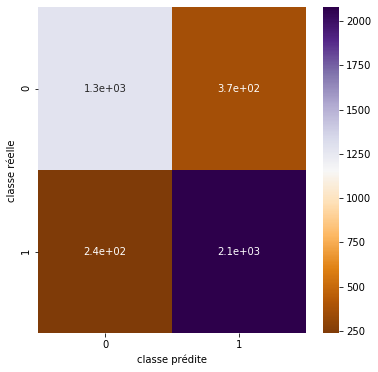

In [25]:
print ('Train Accuracy: %.2f'%clf_GB.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_GB.score(X_test, y_test))

pred = clf_GB.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- GradientBoosting -- ")
pred_clf_GB = clf_GB.predict(X_test)
display(pd.crosstab(y_test, pred_clf_GB,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_GB))

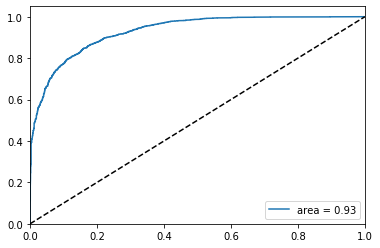

In [26]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_GB.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### RandomForest

In [27]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf_rf= RandomForestClassifier()
clf_rf.fit(X_train, y_train)



Wall time: 17.3 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train Accuracy: 1.00
Test Accuracy: 0.83
classe prédite     0     1
classe réelle             
0               1193   459
1                209  2106
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1652
           1       0.82      0.91      0.86      2315

    accuracy                           0.83      3967
   macro avg       0.84      0.82      0.82      3967
weighted avg       0.83      0.83      0.83      3967

 -- RandomForest -- 


Classe réelle,0,1
Classe prédite,,
0,1193,459
1,209,2106


              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1652
           1       0.82      0.91      0.86      2315

    accuracy                           0.83      3967
   macro avg       0.84      0.82      0.82      3967
weighted avg       0.83      0.83      0.83      3967

Wall time: 702 ms


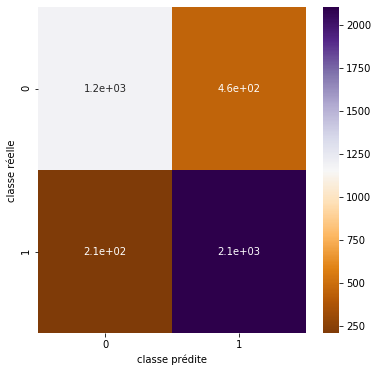

In [28]:
%%time
print ('Train Accuracy: %.2f'%clf_rf.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_rf.score(X_test, y_test))

pred = clf_rf.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))



print(" -- RandomForest -- ")
pred_clf_rf = clf_rf.predict(X_test)
display(pd.crosstab(y_test, pred_clf_rf,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_rf))

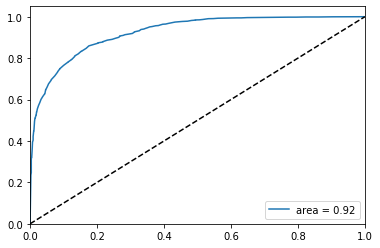

In [29]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_rf.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### Multinomial Naïve Bayes


In [30]:
%%time
from sklearn.naive_bayes import MultinomialNB #Particulièrement adapté aux problèmes de classification avec des features discretes (text classification)
clf_MNB = MultinomialNB() 

clf_MNB.fit(X_train, y_train)

Wall time: 0 ns


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Train Accuracy: 0.71
Test Accuracy: 0.71
classe prédite    0     1
classe réelle            
0               534  1118
1                48  2267
              precision    recall  f1-score   support

           0       0.92      0.32      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

 -- Multinomial Naïve Bayes --


Classe réelle,0,1
Classe prédite,,
0,534,1118
1,48,2267


              precision    recall  f1-score   support

           0       0.92      0.32      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

Wall time: 99.5 ms


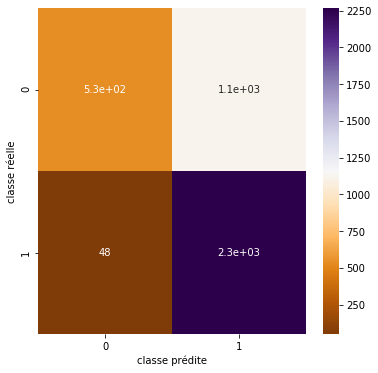

In [31]:
%%time 
print ('Train Accuracy: %.2f'%clf_MNB.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_MNB.score(X_test, y_test))

pred = clf_MNB.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- Multinomial Naïve Bayes --")
pred_clf_MNB= clf_MNB.predict(X_test)
display(pd.crosstab(y_test, pred_clf_MNB,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_MNB))

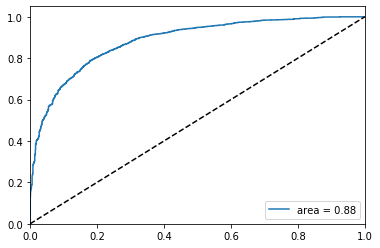

In [32]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_MNB.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

# doc2vec feature

In [46]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Commentaire', 'Sentiment','preprocessed'], axis=1)
mms = MinMaxScaler()
X = pd.concat([docvec_df, X], axis=1)
X = pd.DataFrame(mms.fit_transform(X), columns= X.columns)
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

### Logistic regression


In [47]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf_reglog = LogisticRegression(C=1, max_iter= 10000)
clf_reglog.fit(X_train, y_train)

Wall time: 1.09 s


LogisticRegression(C=1, max_iter=10000)

Train Accuracy: 0.81
Test Accuracy: 0.81
classe prédite    0     1
classe réelle            
0               978   674
1                98  2217
              precision    recall  f1-score   support

           0       0.91      0.59      0.72      1652
           1       0.77      0.96      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.84      0.77      0.78      3967
weighted avg       0.83      0.81      0.80      3967

 -- Régression logistique --


Classe réelle,0,1
Classe prédite,,
0,978,674
1,98,2217


              precision    recall  f1-score   support

           0       0.91      0.59      0.72      1652
           1       0.77      0.96      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.84      0.77      0.78      3967
weighted avg       0.83      0.81      0.80      3967

Wall time: 201 ms


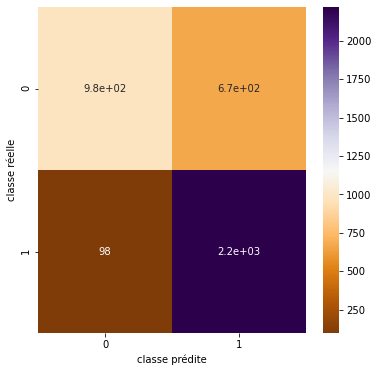

In [48]:
%%time

print ('Train Accuracy: %.2f'%clf_reglog.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_reglog.score(X_test, y_test))

pred = clf_reglog.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])

print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))
# Affichage des prédictions par les différents classifieurs
print(" -- Régression logistique --")
pred_clf_reglog = clf_reglog.predict(X_test)
display(pd.crosstab(y_test, pred_clf_reglog,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_reglog))

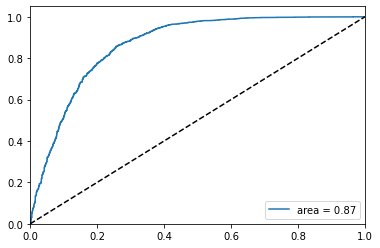

In [49]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_reglog.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

# Gradient Boosting

In [50]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

clf_GB= GradientBoostingClassifier()
clf_GB.fit(X_train, y_train)





Wall time: 1min 35s


GradientBoostingClassifier()

Train Accuracy: 0.83
Test Accuracy: 0.81
classe prédite     0     1
classe réelle             
0               1133   519
1                222  2093
              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1652
           1       0.80      0.90      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.82      0.79      0.80      3967
weighted avg       0.82      0.81      0.81      3967

 -- GradientBoosting -- 


Classe réelle,0,1
Classe prédite,,
0,1133,519
1,222,2093


              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1652
           1       0.80      0.90      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.82      0.79      0.80      3967
weighted avg       0.82      0.81      0.81      3967



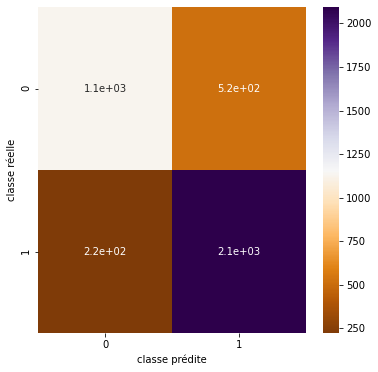

In [51]:
print ('Train Accuracy: %.2f'%clf_GB.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_GB.score(X_test, y_test))

pred = clf_GB.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- GradientBoosting -- ")
pred_clf_GB = clf_GB.predict(X_test)
display(pd.crosstab(y_test, pred_clf_GB,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_GB))

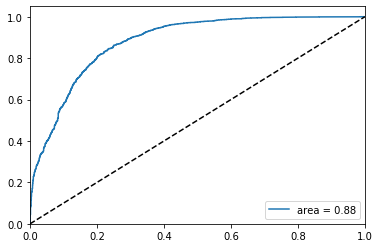

In [39]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_GB.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### RandomForest

In [40]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf_rf= RandomForestClassifier()
clf_rf.fit(X_train, y_train)



Wall time: 26.7 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train Accuracy: 1.00
Test Accuracy: 0.81
classe prédite     0     1
classe réelle             
0               1127   525
1                220  2095
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1652
           1       0.80      0.90      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.82      0.79      0.80      3967
weighted avg       0.82      0.81      0.81      3967

 -- RandomForest -- 


Classe réelle,0,1
Classe prédite,,
0,1127,525
1,220,2095


              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1652
           1       0.80      0.90      0.85      2315

    accuracy                           0.81      3967
   macro avg       0.82      0.79      0.80      3967
weighted avg       0.82      0.81      0.81      3967

Wall time: 867 ms


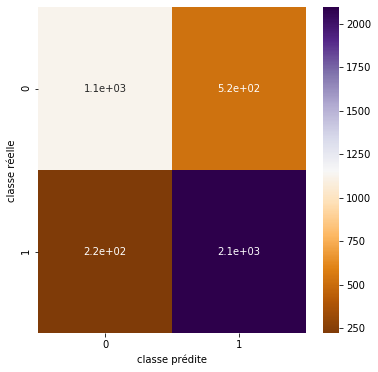

In [41]:
%%time


print ('Train Accuracy: %.2f'%clf_rf.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_rf.score(X_test, y_test))

pred = clf_rf.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))


print(" -- RandomForest -- ")
pred_clf_rf = clf_rf.predict(X_test)
display(pd.crosstab(y_test, pred_clf_rf,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_rf))

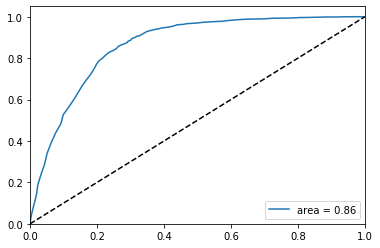

In [42]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_rf.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### SVC

In [43]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf_svm= SVC(C=1, max_iter= 50000, probability= True)
clf_svm.fit(X_train, y_train)


Wall time: 12min 57s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=50000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Wall time: 0 ns
Train Accuracy: 0.90
Test Accuracy: 0.87
classe prédite     0     1
classe réelle             
0               1403   249
1                278  2037
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1652
           1       0.89      0.88      0.89      2315

    accuracy                           0.87      3967
   macro avg       0.86      0.86      0.86      3967
weighted avg       0.87      0.87      0.87      3967

 -- SVC --


Classe réelle,0,1
Classe prédite,,
0,1403,249
1,278,2037


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1652
           1       0.89      0.88      0.89      2315

    accuracy                           0.87      3967
   macro avg       0.86      0.86      0.86      3967
weighted avg       0.87      0.87      0.87      3967



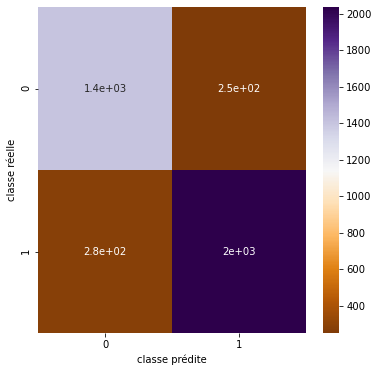

In [32]:
%time

print ('Train Accuracy: %.2f'%clf_svm.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_svm.score(X_test, y_test))

pred = clf_svm.predict(X_test)
crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');

print(classification_report(y_test, pred))

print(" -- SVC --")
pred_clf_svm = clf_svm.predict(X_test)
display(pd.crosstab(y_test, pred_clf_svm,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_svm))

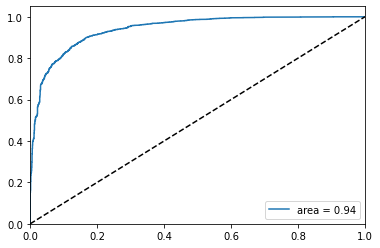

In [33]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_svm.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### Multinomial Naive bayes

In [34]:
%%time
from sklearn.naive_bayes import MultinomialNB #Particulièrement adapté aux problèmes de classification avec des features discretes (text classification)
clf_MNB = MultinomialNB() 

clf_MNB.fit(X_train, y_train)

print ('Train Accuracy: %.2f'%clf_MNB.score(X_train, y_train))
print ('Test Accuracy: %.2f'%clf_MNB.score(X_test, y_test))


Train Accuracy: 0.71
Test Accuracy: 0.71
Wall time: 47 ms


classe prédite    0     1
classe réelle            
0               534  1118
1                48  2267
              precision    recall  f1-score   support

           0       0.92      0.32      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

 -- Multinomial Naïve Bayes --


Classe réelle,0,1
Classe prédite,,
0,534,1118
1,48,2267


              precision    recall  f1-score   support

           0       0.92      0.32      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

Wall time: 139 ms


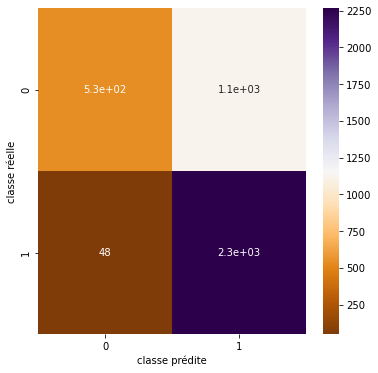

In [35]:
%%time

pred = clf_MNB.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- Multinomial Naïve Bayes --")
pred_clf_MNB= clf_MNB.predict(X_test)
display(pd.crosstab(y_test, pred_clf_MNB,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred_clf_MNB))

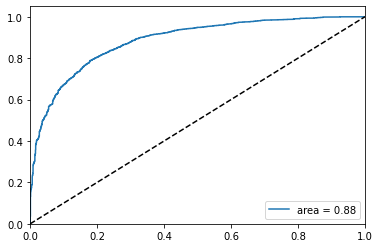

In [36]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = clf_MNB.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### Tunning des hyperparamètres

### WORD2VEC UNIQUEMENT pour les modèles REGRESSION LOG / RANDOM FOREST / et Mulitonomial Naïve Bayes

### REGRESSION LOGISTIQUE

In [37]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['Commentaire', 'Sentiment','preprocessed'], axis=1)
mms = MinMaxScaler()
X = pd.concat([wordvec_df, X], axis=1)
X = pd.DataFrame(mms.fit_transform(X), columns= X.columns)
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

In [38]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter= 500)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
C = [0.01,0.1,1,10,100,120]
grid = dict(solver=solvers,penalty=penalty,C=C)
# define grid search
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_lr = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))
means = grid_lr.cv_results_['mean_test_score']
stds = grid_lr.cv_results_['std_test_score']
params = grid_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.849940 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.814206 (0.008964) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.814206 (0.008964) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.812442 (0.008515) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.835067 (0.006048) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.835130 (0.006113) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.834500 (0.007346) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.843953 (0.007358) with: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.843953 (0.007236) with: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.844961 (0.006414) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.848680 (0.008732) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848869 (0.008716) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.849940 (0.007602) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.849688 (0.008539) with: {

Train Accuracy: 0.86
Test Accuracy: 0.86
classe prédite     0     1
classe réelle             
0               1352   300
1                268  2047
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1652
           1       0.87      0.88      0.88      2315

    accuracy                           0.86      3967
   macro avg       0.85      0.85      0.85      3967
weighted avg       0.86      0.86      0.86      3967

 -- Linear regression optimized --


Classe réelle,0,1
Classe prédite,,
0,1352,300
1,268,2047


              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1652
           1       0.87      0.88      0.88      2315

    accuracy                           0.86      3967
   macro avg       0.85      0.85      0.85      3967
weighted avg       0.86      0.86      0.86      3967

Wall time: 218 ms


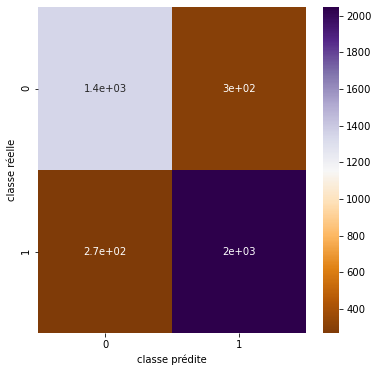

In [39]:
%%time
print ('Train Accuracy: %.2f'%grid_lr.score(X_train, y_train))
print ('Test Accuracy: %.2f'%grid_lr.score(X_test, y_test))

pred = grid_lr.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- Linear regression optimized --")
pred = grid_lr.predict(X_test)
display(pd.crosstab(y_test, pred,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred))

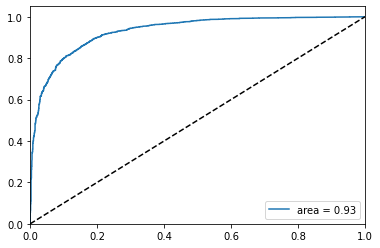

In [40]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = grid_lr.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

### RandomFOREST

In [41]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_grid = {'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15,100,110,130]}
# define grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_rf = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))
means = grid_rf.cv_results_['mean_test_score']
stds = grid_rf.cv_results_['std_test_score']
params = grid_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835193 using {'max_depth': None, 'max_features': 'auto', 'n_estimators': 130}
0.816413 (0.009496) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 5}
0.820445 (0.004408) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 6}
0.818239 (0.002872) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 7}
0.820382 (0.003296) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 8}
0.823218 (0.002619) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 9}
0.822399 (0.003380) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 10}
0.817168 (0.002820) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 11}
0.819815 (0.006032) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 12}
0.823533 (0.004616) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}
0.821895 (0.002116) with: {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 15}
0.826117 (0.002436) with: {'max_depth': 5, 'max_f

Train Accuracy: 0.86
Test Accuracy: 0.86
classe prédite     0     1
classe réelle             
0               1192   460
1                208  2107
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1652
           1       0.82      0.91      0.86      2315

    accuracy                           0.83      3967
   macro avg       0.84      0.82      0.82      3967
weighted avg       0.83      0.83      0.83      3967

 -- Linear regression optimized --


Classe réelle,0,1
Classe prédite,,
0,1192,460
1,208,2107


              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1652
           1       0.82      0.91      0.86      2315

    accuracy                           0.83      3967
   macro avg       0.84      0.82      0.82      3967
weighted avg       0.83      0.83      0.83      3967

Wall time: 824 ms


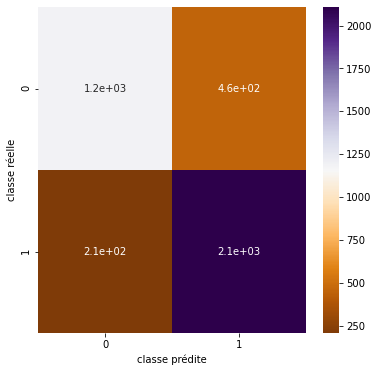

In [42]:
%%time
print ('Train Accuracy: %.2f'%grid_lr.score(X_train, y_train))
print ('Test Accuracy: %.2f'%grid_lr.score(X_test, y_test))

pred = grid_rf.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- Linear regression optimized --")
pred = grid_rf.predict(X_test)
display(pd.crosstab(y_test, pred,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred))

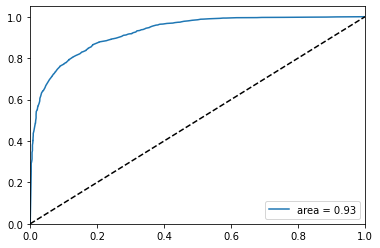

In [43]:
#roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


pred_probas = grid_rf.predict_proba(X_test)[:,1]


fpr,tpr,_ = roc_curve(y_test, pred_probas)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='area = %.2f' %roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')

plt.show()

In [44]:
### Multinomial Naïve Bayes

In [45]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
params = {"alpha": np.linspace(1e-10,1,30)}
grid_MN = GridSearchCV(MultinomialNB(), cv= 5, param_grid = params)
grid_MN.fit(X_train, y_train)
print("Meilleur paramètre : ", grid_MN.best_params_, "permettant d'obtenir un score de " , grid_MN.best_score_)
print("Score sur le trainset :",grid_MN.score(X_train,y_train),"; Score sur le testset : ",grid_MN.score(X_test,y_test))
print("On ne fait à priori pas face à un problème d'overfiting")

Meilleur paramètre :  {'alpha': 1e-10} permettant d'obtenir un score de  0.7151951593777921
Score sur le trainset : 0.7158883216739144 ; Score sur le testset :  0.7065792790521805
On ne fait à priori pas face à un problème d'overfiting
Wall time: 12.4 s


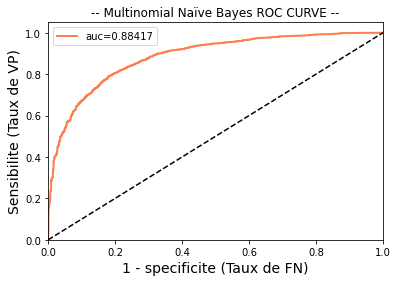

In [46]:
y_pred_MNB = grid_MN.predict_proba(X_test)
from sklearn.metrics import auc, roc_curve

fpr , tpr , seuil = roc_curve(y_test, y_pred_MNB[:,1], pos_label= 1)
aucf= auc(fpr, tpr)

plt.plot(fpr, tpr, color='coral', lw=2, label ='auc=%1.5f' % aucf)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("-- Multinomial Naïve Bayes ROC CURVE --")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite (Taux de FN)', fontsize=14)
plt.ylabel('Sensibilite (Taux de VP)', fontsize=14)
plt.legend();
plt.show();


Train Accuracy: 0.72
Test Accuracy: 0.71
classe prédite    0     1
classe réelle            
0               537  1115
1                49  2266
              precision    recall  f1-score   support

           0       0.92      0.33      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

 -- Multinomial naive baies optimized --


Classe réelle,0,1
Classe prédite,,
0,537,1115
1,49,2266


              precision    recall  f1-score   support

           0       0.92      0.33      0.48      1652
           1       0.67      0.98      0.80      2315

    accuracy                           0.71      3967
   macro avg       0.79      0.65      0.64      3967
weighted avg       0.77      0.71      0.66      3967

Wall time: 363 ms


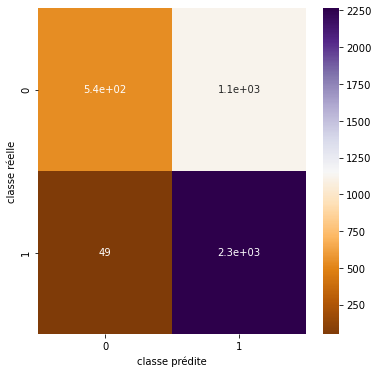

In [47]:
%%time
print ('Train Accuracy: %.2f'%grid_MN.score(X_train, y_train))
print ('Test Accuracy: %.2f'%grid_MN.score(X_test, y_test))

from sklearn.metrics import classification_report 

pred = grid_MN.predict(X_test)

crosstab = pd.crosstab(y_test, pred, rownames=["classe réelle"], colnames=["classe prédite"])
print(crosstab)
plt.figure(figsize=(6,6))
sns.heatmap(crosstab, annot=True, cmap='PuOr');
print(classification_report(y_test, pred))

print(" -- Multinomial naive baies optimized --")
pred = grid_MN.predict(X_test)
display(pd.crosstab(y_test, pred,  colnames=["Classe réelle"], rownames=["Classe prédite"]))
print(classification_report(y_test,pred))

In [48]:
words = list(model_w2v.wv.index_to_key)
